#Introdução

O objetivo do projeto de aprendizado de máquina supervisionado será predizer o sexo dos estudantes, podendo ser masculino(1) e feminino(0)

Todas as variáveis categóricas ordinais e nominais foram transformadas em numéricas no arquivo de limpeza.

As variáveis serão escalonadas para apoiar o treinamento e realização de testes, o objetivo final é gerar para cada algoritmo de predição não supervisionada, uma taxa de acurácia de teste de aproximadamente 85%.

In [383]:
import numpy as np
import pandas as pd

In [384]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [385]:
df = pd.read_csv('/content/drive/MyDrive/studentsperformance-limpo.csv')
df.head(5)

,genero,etnia,nivel_de_escolaridade_dos_pais,almoco,curso_preparatorio,pontuacao_em_matematica,pontuacao_em_leitura,pontuacao_em_escrita,pontuacao_total
0,0,1,4,0,0,72,72,74,72
1,0,2,0,0,1,69,90,88,82
2,0,1,5,0,0,90,95,93,92
3,1,0,1,1,0,47,57,44,49
4,1,2,0,0,0,76,78,75,76


## **Obs:** Os dados desse DataFrame já foram tratados e ja foi feito o Pré-Processamento para a realização dos métodos de pesquisa para Machine Learning.

## **LEGENDA**

   **- Gender (Genero) :** F (Feminino) = 0, M (Masculino) = 1

   **- Race/Ethnicity (Raça/Etnia) :**

   Group A - White (Branco) = 0 
   Group B - Black or African American (Negro ou Afro-Americano) = 1
   Group C - Asian (Asiático) = 2
   Group D - Native American/Alaska Native (Nativo Americano/Nativo do Alasca)
   = 3
   Group E - Native Hawaiian/Pacific Islander (Nativo Havaiano/ Nativo das Ilhas
   do Pacífico) = 4

   **- Parental Level of Education ( Nível de Escolaridade dos Pais) :** 

   Some College (Faculdade Incompleta) = 0
   Associate's Degree (Associado) = 1
   High School (Ensino Médio) = 2
   Some High School (Ensino Médio Incompleto) = 3
   Bachelor's Degree (Bacharél) = 4
   Master's Degree (Mestre) = 5

  **- Lunch (Almoço) :**

  Standard (Comum) = 0
  Free/Reduced (Grátis/Reduzido) = 1

  **- Test Preparation Course (Curso Preparatório para Testes) :**

  None (Nenhum) = 0
  Completed (Completado) = 1

  **- Math Score (Pontuação em Matemática)**

  **- Reading Score (Pontuação em Leitura)**

  **- Writing Score (Pontuação em Escrita)**

  **- Overall Score (Pontuação Total)**

---





In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   genero                          1000 non-null   int64
 1   etnia                           1000 non-null   int64
 2   nivel_de_escolaridade_dos_pais  1000 non-null   int64
 3   almoco                          1000 non-null   int64
 4   curso_preparatorio              1000 non-null   int64
 5   pontuacao_em_matematica         1000 non-null   int64
 6   pontuacao_em_leitura            1000 non-null   int64
 7   pontuacao_em_escrita            1000 non-null   int64
 8   pontuacao_total                 1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


## Normalização ou padronização

Como o dataset possuí 1000 registros (e menos de 5000) é identificado como ideal o teste de Shapiro-Wilk para testar a normalidade dos dados:

A distribuição será considerada normal caso p-valor for superior a 5%

In [387]:
import scipy.stats as stats

In [388]:
#Normalidade das notas de matemática
w, p = stats.shapiro(df.pontuacao_em_matematica)
print("normalidade da pontuação em matematica")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em matematica
valor de estátistica de Shapiro: 99.32% 
p-valor de Shapiro: 0.0145%


In [389]:
#Normalidade das notas de leitura
w, p = stats.shapiro(df.pontuacao_em_leitura)
print("normalidade da pontuação em leitura")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em leitura
valor de estátistica de Shapiro: 99.29% 
p-valor de Shapiro: 0.0106%


In [390]:
#Normalidade das notas de leitura
w, p = stats.shapiro(df.pontuacao_em_escrita)
print("normalidade da pontuação em escrita")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade da pontuação em escrita
valor de estátistica de Shapiro: 99.20% 
p-valor de Shapiro: 0.0029%


In [391]:
#Normalidade das notas (total)
w, p = stats.shapiro(df.pontuacao_total)
print("normalidade   da média das notas")
print("valor de estátistica de Shapiro: %.2f%% " % (w * 100))
print("p-valor de Shapiro: %.4f%%" % (p * 100))

normalidade   da média das notas
valor de estátistica de Shapiro: 99.28% 
p-valor de Shapiro: 0.0090%


As distribuições são todas não-normais (p-valor < 5%), por isso será utilizada padronização

## Previsores e teste



In [392]:
previsores = df.iloc[:, 0:8].values

In [393]:
previsores

array([[ 0,  1,  4, ..., 72, 72, 74],
       [ 0,  2,  0, ..., 69, 90, 88],
       [ 0,  1,  5, ..., 90, 95, 93],
       ...,
       [ 0,  2,  2, ..., 59, 71, 65],
       [ 0,  3,  0, ..., 68, 78, 77],
       [ 0,  3,  0, ..., 77, 86, 86]])

In [394]:
previsores.shape

(1000, 8)

In [395]:
#O teste será realizado para predizer o genênero (índice 0)
target = df.iloc[:, 0].values

In [396]:
target

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [397]:
target.shape

(1000,)

## Escalonamento por padronização

In [398]:
from sklearn.preprocessing import StandardScaler

In [399]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [400]:
previsores_esc

array([[-0.96462528, -1.01504393,  1.37244949, ...,  0.39002351,
         0.19399858,  0.39149181],
       [-0.96462528, -0.15044092, -1.26434108, ...,  0.19207553,
         1.42747598,  1.31326868],
       [-0.96462528, -1.01504393,  2.03164714, ...,  1.57771141,
         1.77010859,  1.64247471],
       ...,
       [-0.96462528, -0.15044092,  0.05405421, ..., -0.46775108,
         0.12547206, -0.20107904],
       [-0.96462528,  0.71416208, -1.26434108, ...,  0.12609287,
         0.60515772,  0.58901542],
       [-0.96462528,  0.71416208, -1.26434108, ...,  0.71993682,
         1.15336989,  1.18158627]])

In [401]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7
0,-0.964625,-1.015044,1.372449,-0.741881,-0.746748,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,-1.264341,-0.741881,1.339140,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,2.031647,-0.741881,-0.746748,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-0.605143,1.347925,-0.746748,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,-1.264341,-0.741881,-0.746748,0.653954,0.605158,0.457333
...,...,...,...,...,...,...,...,...
995,-0.964625,1.578765,2.031647,-0.741881,1.339140,1.445746,2.044215,1.774157
996,1.036672,-0.150441,0.054054,1.347925,-0.746748,-0.269803,-0.970952,-0.859491
997,-0.964625,-0.150441,0.054054,1.347925,1.339140,-0.467751,0.125472,-0.201079
998,-0.964625,0.714162,-1.264341,-0.741881,1.339140,0.126093,0.605158,0.589015


## Base de treino e teste
Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [402]:
from sklearn.model_selection import train_test_split

In [403]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, target, test_size = 0.3, random_state = 10)

In [404]:
print("Dados para treino: " + str(x_treino.shape) + " dados para teste: " + str(x_teste.shape))

Dados para treino: (700, 8) dados para teste: (300, 8)



 ## Árvore de decisão

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [406]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5, 0.75, 'X[0] <= 0.036\nentropy = 0.995\nsamples = 700\nvalue = [380, 320]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 380\nvalue = [380, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 320\nvalue = [0, 320]')]

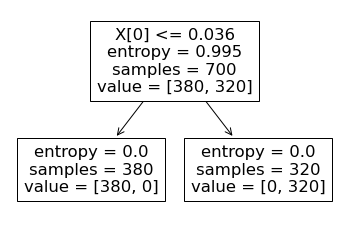

In [407]:
tree.plot_tree(_arvore)

In [408]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [409]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [410]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 100.0000%


In [411]:
confusion_matrix(y_teste, previsoes_arvore)

array([[138,   0],
       [  0, 162]])

In [412]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       162

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Análise dados de treino

In [413]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [414]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [415]:
confusion_matrix(y_treino, previsoes_treino)

array([[380,   0],
       [  0, 320]])

Conclusão:

## Random Forests

In [416]:
from sklearn.ensemble import RandomForestClassifier

In [417]:
random = RandomForestClassifier(n_estimators=1, criterion='entropy', random_state = 0, max_depth=4)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=1,
                       random_state=0)

In [418]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [419]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 81.0000%


In [420]:
confusion_matrix(y_teste, previsoes_random)

array([[ 90,  48],
       [  9, 153]])

In [421]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       138
           1       0.76      0.94      0.84       162

    accuracy                           0.81       300
   macro avg       0.84      0.80      0.80       300
weighted avg       0.83      0.81      0.80       300



In [422]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [423]:
confusion_matrix(y_treino, previsoes_treino)

array([[380,   0],
       [  0, 320]])

Conclusão:

## Regressão logística

In [424]:
from sklearn.linear_model import LogisticRegression

In [426]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=2,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, random_state=1)

In [427]:
logistica.intercept_

array([-0.27784149])

In [428]:
logistica.coef_

array([[ 5.17983453, -0.02389135,  0.06448959,  0.02563269,  0.14341222,
         0.97141124, -0.41369194, -0.75099826]])

In [429]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [431]:
print("Acurácia: %.4f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 81.0000%


In [432]:
confusion_matrix(y_teste, previsoes_logistica)

array([[138,   0],
       [  0, 162]])

In [433]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       162

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Analise dados de treino

In [434]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,

In [435]:
accuracy_score(y_treino, previsoes_treino)

1.0

In [436]:
confusion_matrix(y_treino, previsoes_treino)

array([[380,   0],
       [  0, 320]])

Conclusão: